# README

 This notebook is a part of the reproducibility repository for the paper "Cohort-level analysis of human de novo mutations points to drivers of clonal expansion in spermatogonia." The notebook contains a snippet of code for calculating the power of paternal overtransmission test to detect
clonal expansions in spermatogonia with respect to the number of tested mutations $N_{\text{vars}}$ and elevation of the mutation rate due to CES $\kappa$.

Assumptions:

1. Binomial test for the deviation of the observed fraction of paternally transmitted mutations from an assumed constant null given by $p_0$

2. $p_0 = 3/4$

3. Linear effect of CES meaning that $p$ of alternative hypothesis is given by $\frac{\kappa}{1/3 + \kappa}$ (which becomes $3/4$ under $\kappa = 1$)

# Dependencies

This Jupyter Notebook relies on the following Python libraries:

- **NumPy**: Provides support for numerical computations and array manipulations.
- **Matplotlib**: Used for creating static, interactive, and animated visualizations.
- **SciPy**: Includes statistical functions and distributions, such as `binom`, `nbinom`, `norm`, and `poisson`.
- **Seaborn**: Facilitates the creation of attractive and informative statistical graphics.

In [5]:
# Load necessary libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
import seaborn as sns

In [67]:
# Declare constants

alphas = [0.05, 0.01, 0.001] # significance levels
Max_Nvars = 100 # maximum number of variants
kappas_tested = 100 # number of kappa values to test
kappas = np.logspace(0, 2, kappas_tested) # rkappa values to test
log10_Max_kappa = 2 # maximum log10 kappa value


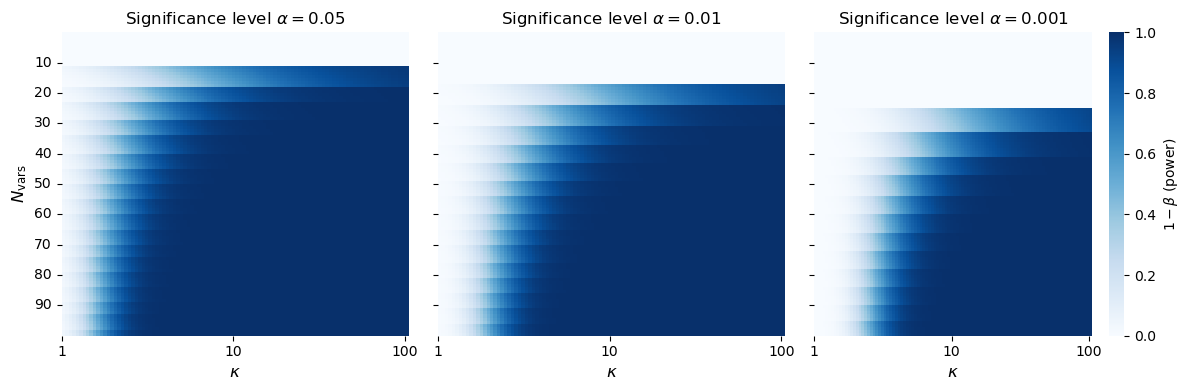

In [ ]:
# Power computations for the binomial test

# Function to calculate the power of the binomial test
def Binom_power(mut_num, kappa, alpha, p0=0.75):
    """
    Calculate the power of the binomial test for a given mutation number and kappa.
    
    mut_num: Number of tested mutations (N_vars)
    kappa: Elevation of mutation rate due to CES
    alpha: Significance level
    p0 : Null hypothesis proportion (default: 0.75)
    """
    N = mut_num  # Number of tested mutations
    k = binom.ppf(1 - alpha, N, p0)  # Critical value for the binomial test
    p1 = kappa / (1/3 + kappa)  # Alternative hypothesis proportion
    return 1 - binom.cdf(k, N, p1)  # Compute power (1 - beta)

# Initialize a matrix to store the power values for each alpha
# Initialize a dictionary to store power matrices for each alpha
pow_mats = {}

# Compute power values for each alpha and store them in the dictionary
for alpha in alphas:
    pow_mat = np.zeros((Max_Nvars, kappas_tested))  # Initialize matrix to store power values
    for mut_num in range(Max_Nvars):
        for i, kappa in enumerate(kappas):
            pow_mat[mut_num, i] = Binom_power(mut_num, kappa, alpha)
    pow_mats[alpha] = pow_mat

# Create a figure with three horizontal panes
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

# Plot each heatmap for the corresponding alpha
for ax, alpha in zip(axes, alphas):
    sns.heatmap(
        pow_mats[alpha], 
        ax=ax, 
        cmap='Blues', 
        xticklabels=10, 
        yticklabels=np.arange(1, Max_Nvars + 1) if ax == axes[0] else False,  # Leave yticks only on the first panel
        cbar=ax == axes[-1],  # Show colorbar only on the last panel
        cbar_kws={'label': r'$1 - \beta$ (power)'} if ax == axes[-1] else None
    )
    ax.set_xlabel(r"$\kappa$", fontsize=12)
    if ax == axes[0]:  # Set ylabel only for the first panel
        ax.set_ylabel(r'$N_{\text{vars}}$', fontsize=12)
    ax.set_yticks(ticks = np.arange(Max_Nvars//10, Max_Nvars, 10))  # Set y-ticks at intervals of 10
    ax.set_yticklabels(np.arange(Max_Nvars//10, Max_Nvars, 10), fontsize=10)  # Set y-tick labels

    ax.set_title(rf'Significance level $\alpha={alpha}$', fontsize=12)
    ax.set_xticks(
        ticks=np.log10([1, 10, 100]) * (kappas_tested - 1) / log10_Max_kappa
    )
    ax.set_xticklabels([1, 10, 100], fontsize=10)

    # Save the figure, display
    plt.tight_layout()
plt.savefig('binomial_power_heatmaps.png', dpi=600)
plt.show()

